<a href="https://colab.research.google.com/github/SergeiSa/Computational-Intelligence-Slides-Fall-2020/blob/master/Google%20Colab%20notebooks/practice_04/practice_qp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quadprog

from quadprog import solve_qp
from numpy import vstack, hstack 

def get_qp(P, q, G=None, h=None, A=None, b=None):
    """ minimize: x.T*H*x + q.T*x 
             s.t: G*x <= h
                  A*x == b """
    qp_G = .5 * (P + P.T)   # make sure P is symmetric
    qp_a = -q
    if A is not None: # Both equality and inequality constraints
        qp_C = - vstack([A, G]).T
        qp_b = - hstack([b, h])
        meq = A.shape[0]
    else:  # no equality constraint
        qp_C = -G.T
        qp_b = -h
        meq = 0
    return solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

  Created wheel for quadprog: filename=quadprog-0.1.7-cp36-cp36m-linux_x86_64.whl size=299401 sha256=e54538bc774d7b15fb429318b2650bfcd2c4748f630db52f33e13f84064337dd
  Stored in directory: /root/.cache/pip/wheels/36/dd/b1/849989444c0a5930927b260663019b7da6cff864fc224c2747
Successfully built quadprog


In [ ]:
from numpy import array, dot
M = array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
P = dot(M.T, M)
q = -dot(M.T, array([3., 2., 3.]))
G = array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
h = array([3., 2., -2.]).reshape((3,))

get_qp(P, q, G, h)

array([ 0.12997347, -0.06498674,  1.74005305])

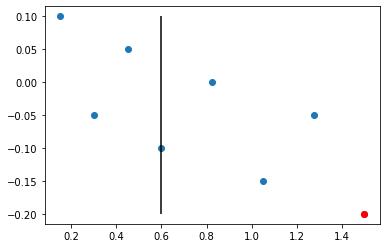

In [ ]:
from numpy import eye,zeros, kron, ones, diag, sum, cumsum
N = 8
x0, x1, xf, yf = 0.5, 0.7, 1.5, -0.2


""" minimize: dr.T*H*dr + q.T*dr 
         s.t: G*dr <= h
              A*dr == b """


G, h = zeros((2*N,2*N)), zeros((2*N))  
G[:N, :] = -kron(eye(N), [1,0])
G[N:N + int(N/2), :] =  - kron(eye(int(N/2)), [0,1,0,0])
h[N:N + int(N/2)] = -0.1*ones(4)
G[N + int(N/2):2*N, :] = kron(eye(int(N/2)), [0,0,0,1])
h[N + int(N/2):2*N] = 0.1*ones(4)
A , b = zeros((3,2*N)), zeros(3)
A[:2,:] = kron(ones(N),eye(2))
b[:2] = [xf, yf]
A[2,:4*2] = kron(ones(4),[1,0])
b[2] = (x1+x0)/2

R = diag([1,2])
H = kron(eye(N),R)
q = zeros(2*N)
dr = get_qp(H,q,G,h,A,b).reshape((N,2))

r = cumsum(dr,axis=0)
import matplotlib.pyplot as plt

plt.scatter(r[:,0],r[:,1])
plt.vlines((x0+x1)/2, min(r[:,1]),max(r[:,1]))
plt.scatter(xf,yf, color = 'red')
plt.show()

